In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 3
hx, hy = 1.0 / (N+1), 1.0 / (N-1)
T_left, T_right = 500.15,293.15

In [3]:
A = np.zeros((N*(N+2),N*(N+2)))
f = np.zeros(N*(N+2))

In [4]:
def kappa(x,y):
    return 410.0

In [5]:
for j in range(1,N+1):
    for i in range(1,N+1):
        n = i + j * N - 1
        xi = i * hx
        yj = (j-1) * hy
        
        kxp = kappa(xi+hx/2,yj)
        kxm = kappa(xi-hx/2,yj)
        kyp = kappa(xi,yj+hy/2)
        kym = kappa(xi,yj-hy/2)
        
        A[n,n] = -(kxp+kxm)/hx/hx - (kyp+kym)/hy/hy
        
        if i > 1:
            A[n,n-1] = kxm/hx/hx
        else:
            f[n] = f[n] - T_left*kxm/hx/hx
        
        if i < N:
            A[n,n+1] = kxp/hx/hx 
        else:
            f[n] = f[n] - T_right*kxp/hx/hx
        
        A[n,n+N] = kyp/hy/hy
        A[n,n-N] = kym/hy/hy

In [6]:
for i in range(1,N+1):
    n = i + 0 * N - 1
    A[n,n] = 1.0
    A[n,n+2*N] = -1.0

for i in range(1,N+1):
    n = i + (N+1) * N - 1
    A[n,n] = 1.0
    A[n, n-2*N] = -1.0

In [14]:
T = np.linalg.solve(A,f)
T = T.reshape(N+2,N)

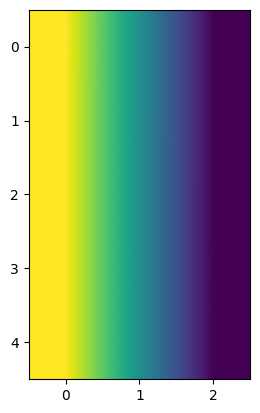

In [15]:
plt.imshow(T, interpolation= 'bilinear')